In [59]:
import numpy as np
import salem
from salem import wgs84

In [60]:
path = f'/home/sagus/Development/temp/wrfout_A_d01_2020-02-06_18:00:00'
# Define KM_PER_DEGREE
KM_PER_DEGREE = 111.32

In [61]:
dx = 4/111.32

In [62]:
x0 = 2/111.32

In [51]:
grid = salem.Grid(nxny=(270, 270), dxdy=(dx, dx), x0y0=(-68.91031, -37.21706), proj=wgs84)

In [56]:
grid.transform

<bound method Grid.transform of <salem.Grid>
  proj: +datum=WGS84 +no_defs+proj=longlat
  pixel_ref: center
  origin: lower-left
  (nx, ny): (270, 270)
  (dx, dy): (0.035932446999640676, 0.035932446999640676)
  (x0, y0): (-68.91031, -37.21706)
>

In [63]:
dse = salem.open_wrf_dataset(path)

In [64]:
dse

<xarray.Dataset>
Dimensions:                (bottom_top: 34, seed_dim: 1, soil_layers: 3, south_north: 269, time: 58, west_east: 269)
Coordinates:
    lat                    (south_north, west_east) float32 -37.21706 ... -27...
    lon                    (south_north, west_east) float32 -68.91031 ... -57...
    xtime                  (time) datetime64[ns] ...
  * time                   (time) datetime64[ns] 2020-02-06T18:00:00 ... 2020...
  * west_east              (west_east) float64 -5.36e+05 -5.32e+05 ... 5.36e+05
  * south_north            (south_north) float64 -5.36e+05 ... 5.36e+05
Dimensions without coordinates: bottom_top, seed_dim, soil_layers
Data variables:
    LU_INDEX               (time, south_north, west_east) float32 ...
    ZNU                    (time, bottom_top) float32 ...
    ZNW                    (time, bottom_top) float32 ...
    ZS                     (time, soil_layers) float32 ...
    DZS                    (time, soil_layers) float32 ...
    VAR_SSO                (time, south_north, west_east) float32 ...
    U                      (time, bottom_top, south_north, west_east) float32 ...
    V                      (time, bottom_top, south_north, west_east) float32 ...
    W                      (time, bottom_top, south_north, west_east) float32 ...
    PH                     (time, bottom_top, south_north, west_east) float32 ...
    PHB                    (time, bottom_top, south_north, west_east) float32 ...
    T                      (time, bottom_top, south_north, west_east) float32 ...
    THM                    (time, bottom_top, south_north, west_east) float32 ...
    HFX_FORCE              (time) float32 ...
    LH_FORCE               (time) float32 ...
    TSK_FORCE              (time) float32 ...
    HFX_FORCE_TEND         (time) float32 ...
    LH_FORCE_TEND          (time) float32 ...
    TSK_FORCE_TEND         (time) float32 ...
    MU                     (time, south_north, west_east) float32 ...
    MUB                    (time, south_north, west_east) float32 ...
    NEST_POS               (time, south_north, west_east) float32 ...
    P                      (time, bottom_top, south_north, west_east) float32 ...
    PB                     (time, bottom_top, south_north, west_east) float32 ...
    FNM                    (time, bottom_top) float32 ...
    FNP                    (time, bottom_top) float32 ...
    RDNW                   (time, bottom_top) float32 ...
    RDN                    (time, bottom_top) float32 ...
    DNW                    (time, bottom_top) float32 ...
    DN                     (time, bottom_top) float32 ...
    CFN                    (time) float32 ...
    CFN1                   (time) float32 ...
    THIS_IS_AN_IDEAL_RUN   (time) int32 ...
    P_HYD                  (time, bottom_top, south_north, west_east) float32 ...
    Q2                     (time, south_north, west_east) float32 ...
    T2                     (time, south_north, west_east) float32 ...
    TH2                    (time, south_north, west_east) float32 ...
    PSFC                   (time, south_north, west_east) float32 ...
    U10                    (time, south_north, west_east) float32 ...
    V10                    (time, south_north, west_east) float32 ...
    RDX                    (time) float32 ...
    RDY                    (time) float32 ...
    RESM                   (time) float32 ...
    ZETATOP                (time) float32 ...
    CF1                    (time) float32 ...
    CF2                    (time) float32 ...
    CF3                    (time) float32 ...
    ITIMESTEP              (time) int32 ...
    QVAPOR                 (time, bottom_top, south_north, west_east) float32 ...
    QCLOUD                 (time, bottom_top, south_north, west_east) float32 ...
    QRAIN                  (time, bottom_top, south_north, west_east) float32 ...
    QICE                   (time, bottom_top, south_north, west_east) float32 ...
    QSNOW                  (time, bottom_top,

In [71]:
dse.coords['lon'].min()

<xarray.DataArray 'lon' ()>
array(-68.91031, dtype=float32)

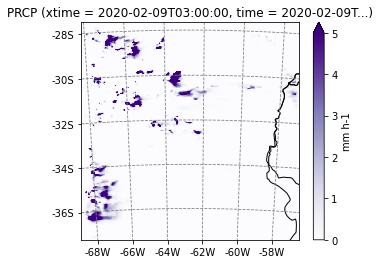

In [20]:
dse.PRCP.isel(time=-1).salem.quick_map(cmap='Purples', vmax=5)

In [17]:
dsgrid = dse.salem.grid

In [18]:
dsgrid.proj.crs

<Projected CRS: +proj=lcc +lat_1=-60.0 +lat_2=-30.0 +lat_0=-32.500 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Conic Conformal (2SP)
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

In [19]:
dsgrid.extent

[-538001.0623448786, 537998.9376551214, -538000.0000000792, 537999.9999999208]

In [50]:
dse.T2.isel(time=0)

<xarray.DataArray 'T2' (south_north: 269, west_east: 269)>
array([[293.81305, 293.4371 , 293.04083, ..., 295.52032, 295.58313, 295.55872],
       [293.20084, 292.84338, 292.48666, ..., 295.74042, 295.69867, 295.60883],
       [292.45514, 292.125  , 291.82144, ..., 296.02524, 295.84448, 295.66495],
       ...,
       [287.55817, 287.86786, 288.58176, ..., 308.2441 , 308.23123, 308.24722],
       [287.2085 , 287.52707, 288.2849 , ..., 308.36002, 308.36517, 308.40125],
       [286.92038, 287.2457 , 288.04575, ..., 308.42926, 308.45093, 308.50375]],
      dtype=float32)
Coordinates:
    lat          (south_north, west_east) float32 -37.21706 ... -27.518177
    lon          (south_north, west_east) float32 -68.91031 ... -57.32242
    xtime        datetime64[ns] 2020-02-06T18:00:00
    time         datetime64[ns] 2020-02-06T18:00:00
  * west_east    (west_east) float64 -5.36e+05 -5.32e+05 ... 5.32e+05 5.36e+05
  * south_north  (south_north) float64 -5.36e+05 -5.32e+05 ... 5.32e+05 5.36e+05
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  TEMP at 2 M
    units:        K
    stagger:      
    pyproj_srs:   +proj=lcc +lat_0=-32.5000076293945 +lon_0=-62.7000007629395...

In [49]:
t2_reproj = grid.transform(dse.T2.isel(time=0))

TypeError: transform() missing 1 required positional argument: 'y'

In [46]:
grid.transform(dse.t2m.isel(time=0))

AttributeError: 'Dataset' object has no attribute 't2m'

In [57]:
grid.extent

[-68.92827622349982,
 -59.22651553359684,
 -37.235026223499816,
 -27.533265533596833]

In [58]:
WRF_EXTENT = [-68.91031, -37.21706, -57.32242, -27.518177]

In [ ]:
WRF_EXTENT = [-68.91031
             -37.21706,
             -57.32242,
             -27.518177]

In [77]:
cuencas_api_dict = { {'meta': {}, 'csv': {'ppn_acum_diario': {"24":}, 'ppn_por_hora': {}}},
                    "36": {'meta': {}, 'csv': {'ppn_acum_diario': {}, 'ppn_por_hora': {}}},
                    "48": {'meta': {}, 'csv': {'ppn_acum_diario': {}, 'ppn_por_hora': {}}}}

In [78]:
cuencas_api_dict['24']['csv']['ppn_acum_diario']['path'] = f"a/b/cordoba/cuencas_c.csv"
cuencas_api_dict['24']['csv']['ppn_acum_diario']['is_image'] = False
cuencas_api_dict['24']['csv']['ppn_acum_diario']['acumulacion'] = "24:00:00"

In [79]:
cuencas_api_dict

{'24': {'meta': {},
  'csv': {'ppn_acum_diario': {'path': 'a/b/cordoba/cuencas_c.csv',
    'is_image': False,
    'acumulacion': '24:00:00'},
   'ppn_por_hora': {}}},
 '36': {'meta': {}, 'csv': {'ppn_acum_diario': {}, 'ppn_por_hora': {}}},
 '48': {'meta': {}, 'csv': {'ppn_acum_diario': {}, 'ppn_por_hora': {}}}}

In [80]:
cuencas_api_dict['36']['csv']['ppn_acum_diario']['path'] = f"a/b/cordoba/cuencas_c_36.csv"
cuencas_api_dict['36']['csv']['ppn_acum_diario']['is_image'] = False
cuencas_api_dict['36']['csv']['ppn_acum_diario']['acumulacion'] = "36:00:00"

In [81]:
cuencas_api_dict

{'24': {'meta': {},
  'csv': {'ppn_acum_diario': {'path': 'a/b/cordoba/cuencas_c.csv',
    'is_image': False,
    'acumulacion': '24:00:00'},
   'ppn_por_hora': {}}},
 '36': {'meta': {},
  'csv': {'ppn_acum_diario': {'path': 'a/b/cordoba/cuencas_c_36.csv',
    'is_image': False,
    'acumulacion': '36:00:00'},
   'ppn_por_hora': {}}},
 '48': {'meta': {}, 'csv': {'ppn_acum_diario': {}, 'ppn_por_hora': {}}}}

In [90]:
cuencas_api_dict = {'meta': {}, 'csv': { 'ppn_por_hora': {}, 'ppn_acum_diario': {"24":{}, "36":{}, "48":{} }}}

In [91]:
cuencas_api_dict

{'meta': {},
 'csv': {'ppn_por_hora': {},
  'ppn_acum_diario': {'24': {}, '36': {}, '48': {}}}}

In [93]:
cuencas_api_dict['csv']['ppn_acum_diario']['36']['path'] = f"a/b/cordoba/cuencas_c_36.csv"
cuencas_api_dict['csv']['ppn_acum_diario']['36']['is_image'] = False